# Lab 2. Series de Tiempo

## Miembros
- Fernanda Esquivel 21542
- Sofía Lam 21548

## Link al repositorio
El repositorio puede ser visualizado [acá](https://github.com/SofiLam13/Lab2-DS-)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import anderson
from sklearn.preprocessing import MultiLabelBinarizer

%matplotlib inline

## **Exploración de los datos**

In [3]:
consumo = pd.read_csv('CONSUMO-2024-05.csv')
importacion=pd.read_csv('IMPORTACION-VOLUMEN-2024-05.csv')
PreciosPromedio=pd.read_csv('PreciosPromedioNacionales.csv')

**Consumo de combustibles**

In [4]:
consumo.head()

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,Jan/2000,0.00,"48,446.00","296,766.99",0.0,0.00,0.00,0.00,"194,410.48","1,426.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feb/2000,0.00,"50,597.00","328,116.44",0.0,0.00,0.00,0.00,"174,710.55","1,458.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mar/2000,0.00,"27,593.00","368,589.63",0.0,0.00,0.00,0.00,"189,234.07","1,503.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apr/2000,0.00,"53,794.00","396,300.47",0.0,0.00,0.00,0.00,"174,330.61","1,561.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,May/2000,0.00,"60,137.00","449,368.92",0.0,0.00,0.00,0.00,"191,745.15","1,642.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
consumo.dtypes

,0
Fecha,object
Aceites lubricantes,object
Asfalto,object
Bunker,object
Ceras,float64
Combustible turbo jet,object
Diesel bajo azufre,object
Diesel ultra bajo azufre,object
Gas licuado de petróleo,object
Gasolina de aviación,object


Como vemos anteriormente, tenemos columnas que no tienen nombre debido a que se encuentran vacías, estas columnas extra pueden ser debido a que al descargar el conjunto de datos sólo da la opción de descargarlo en formato excel, la conversión a .csv pudo haber agregado estas columnas extra. Por lo que se procede a eliminar estas columnas, para tener el data frame original.

In [6]:
columnas_a_eliminar=[f'Unnamed: {i}' for i in range(23,53)]
consumo = consumo.drop(columns= columnas_a_eliminar)

In [7]:
consumo.head()

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Kerosina,Mezclas\noleosas,Naftas,PetCoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,Orimulsión,Total
0,Jan/2000,0.00,"48,446.00","296,766.99",0.0,0.00,0.00,0.00,"194,410.48","1,426.00",...,"64,026.09",0.00,0.0,0.00,0.00,0.00,0.0,"634,667.06",0.00,"1,750,544.64"
1,Feb/2000,0.00,"50,597.00","328,116.44",0.0,0.00,0.00,0.00,"174,710.55","1,458.00",...,"62,660.30",0.00,0.0,0.00,0.00,0.00,0.0,"642,380.66",0.00,"1,773,220.22"
2,Mar/2000,0.00,"27,593.00","368,589.63",0.0,0.00,0.00,0.00,"189,234.07","1,503.00",...,"61,361.99",0.00,0.0,0.00,0.00,0.00,0.0,"699,807.25",0.00,"1,909,498.79"
3,Apr/2000,0.00,"53,794.00","396,300.47",0.0,0.00,0.00,0.00,"174,330.61","1,561.00",...,"61,814.32",0.00,0.0,0.00,0.00,0.00,0.0,"586,803.98",0.00,"1,800,932.86"
4,May/2000,0.00,"60,137.00","449,368.92",0.0,0.00,0.00,0.00,"191,745.15","1,642.00",...,"54,098.32",0.00,0.0,0.00,0.00,0.00,0.0,"656,948.20",0.00,"1,941,771.90"


Vemos que los datos que nos interesan son de tipo "object" en lugar de float, por lo que convertimos estos valores en float, para esto también debemos quitar las comas en las columnas.

In [8]:
consumo["Gasolina superior"] = consumo["Gasolina superior"].astype(str)
consumo["Gasolina superior"] = consumo["Gasolina superior"].apply(lambda x: x.replace(',', '')).astype(float)
consumo["Gasolina regular"] = consumo["Gasolina regular"].astype(str)
consumo["Gasolina regular"] = consumo["Gasolina regular"].apply(lambda x: x.replace(',', '')).astype(float)
consumo["Diesel bajo azufre"] = consumo["Diesel bajo azufre"].astype(str)
consumo["Diesel bajo azufre"] = consumo["Diesel bajo azufre"].apply(lambda x: x.replace(',', '')).astype(float)
consumo.head()

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Kerosina,Mezclas\noleosas,Naftas,PetCoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,Orimulsión,Total
0,Jan/2000,0.00,"48,446.00","296,766.99",0.0,0.00,0.0,0.00,"194,410.48","1,426.00",...,"64,026.09",0.00,0.0,0.00,0.00,0.00,0.0,"634,667.06",0.00,"1,750,544.64"
1,Feb/2000,0.00,"50,597.00","328,116.44",0.0,0.00,0.0,0.00,"174,710.55","1,458.00",...,"62,660.30",0.00,0.0,0.00,0.00,0.00,0.0,"642,380.66",0.00,"1,773,220.22"
2,Mar/2000,0.00,"27,593.00","368,589.63",0.0,0.00,0.0,0.00,"189,234.07","1,503.00",...,"61,361.99",0.00,0.0,0.00,0.00,0.00,0.0,"699,807.25",0.00,"1,909,498.79"
3,Apr/2000,0.00,"53,794.00","396,300.47",0.0,0.00,0.0,0.00,"174,330.61","1,561.00",...,"61,814.32",0.00,0.0,0.00,0.00,0.00,0.0,"586,803.98",0.00,"1,800,932.86"
4,May/2000,0.00,"60,137.00","449,368.92",0.0,0.00,0.0,0.00,"191,745.15","1,642.00",...,"54,098.32",0.00,0.0,0.00,0.00,0.00,0.0,"656,948.20",0.00,"1,941,771.90"


Pasamos la columna de fecha al formato de fecha para podeer realizar las series de tiempo correspondientes.

In [9]:
consumo['Fecha'] = pd.to_datetime(consumo['Fecha'], format='%b/%Y')

In [10]:
consumo.set_index('Fecha', inplace=True)

**Importación de Combustibles**


In [11]:
importacion.head()

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Naftas,Petcoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,MTBE,Orimulsión,Petróleo reconstituido,Total importación
0,Jan-01,0,"27,748.99","214,581.84",0.0,0,0,0,"194,065.74",820,...,0.0,0,0,0,0.0,"566,101.99","8,402.00",0,"715,344.00","2,312,639.05"
1,Feb-01,0,"7,503.57","294,609.00",0.0,0,0,0,"170,703.38","3,054.00",...,0.0,0,0,0,0.0,"489,525.80",0,0,"370,166.00","1,769,208.76"
2,Mar-01,0,"26,304.32","315,263.80",0.0,0,0,0,"161,837.37",677,...,0.0,0,0,0,0.0,"575,559.68",0,0,"360,530.00","1,945,770.26"
3,Apr-01,0,"7,885.89","205,653.00",0.0,0,0,0,"163,048.64","3,399.00",...,0.0,0,0,0,0.0,"437,745.42","8,184.00",0,"359,527.00","1,623,637.76"
4,May-01,0,"8,443.16","278,371.30",0.0,0,0,0,"171,518.86",585,...,0.0,0,0,0,0.0,"552,609.13","12,680.00",0,"723,346.00","2,262,726.64"


In [12]:
importacion.dtypes

,0
Fecha,object
Aceites lubricantes,object
Asfalto,object
Bunker,object
Ceras,float64
Combustible turbo jet,object
Diesel bajo azufre,object
Diesel ultra bajo azufre,object
Gas licuado de petróleo,object
Gasolina de aviación,object


Al igual que en el data frame del Consumo de combustible, las variables que nos interesan en este conjunto de datos son de tipo "object" por lo que los reescribimos como floats al eliminar las comas en los datos de interés

In [13]:
importacion["Gasolina superior"] = importacion["Gasolina superior"].astype(str)
importacion["Gasolina superior"] = importacion["Gasolina superior"].apply(lambda x: x.replace(',', '')).astype(float)
importacion["Gasolina regular"] = importacion["Gasolina regular"].astype(str)
importacion["Gasolina regular"] = importacion["Gasolina regular"].apply(lambda x: x.replace(',', '')).astype(float)
importacion["Diesel bajo azufre"] = importacion["Diesel bajo azufre"].astype(str)
importacion["Diesel bajo azufre"] = importacion["Diesel bajo azufre"].apply(lambda x: x.replace(',', '')).astype(float)
importacion["Gas licuado de petróleo"] = importacion["Gas licuado de petróleo"].astype(str)
importacion["Gas licuado de petróleo"] = importacion["Gas licuado de petróleo"].apply(lambda x: x.replace(',', '')).astype(float)
importacion.head()

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Naftas,Petcoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,MTBE,Orimulsión,Petróleo reconstituido,Total importación
0,Jan-01,0,"27,748.99","214,581.84",0.0,0,0.0,0,194065.74,820,...,0.0,0,0,0,0.0,"566,101.99","8,402.00",0,"715,344.00","2,312,639.05"
1,Feb-01,0,"7,503.57","294,609.00",0.0,0,0.0,0,170703.38,"3,054.00",...,0.0,0,0,0,0.0,"489,525.80",0,0,"370,166.00","1,769,208.76"
2,Mar-01,0,"26,304.32","315,263.80",0.0,0,0.0,0,161837.37,677,...,0.0,0,0,0,0.0,"575,559.68",0,0,"360,530.00","1,945,770.26"
3,Apr-01,0,"7,885.89","205,653.00",0.0,0,0.0,0,163048.64,"3,399.00",...,0.0,0,0,0,0.0,"437,745.42","8,184.00",0,"359,527.00","1,623,637.76"
4,May-01,0,"8,443.16","278,371.30",0.0,0,0.0,0,171518.86,585,...,0.0,0,0,0,0.0,"552,609.13","12,680.00",0,"723,346.00","2,262,726.64"


Reescribimos la fecha en formato de fecha para poder realizar la serie de tiempo

In [14]:
importacion['Fecha'] = pd.to_datetime(importacion['Fecha'], format='%b-%y', errors='coerce')
importacion.set_index('Fecha', inplace=True)

**Precios Promedios a consumidor final en Ciudad Capital**

In [15]:
PreciosPromedio.head()

,FECHA,Tipo de cambio,Superior,Regular,Diesel,Bunker,Glp Cilindro 25Lbs.,Unnamed: 7
0,01/Jan/2021,7.79382,21.91,21.11,17.61,13.40,99.0,3.96
1,02/Jan/2021,7.79382,21.91,21.11,17.61,13.40,99.0,3.96
2,03/Jan/2021,7.79382,21.91,21.11,17.61,13.40,99.0,3.96
3,04/Jan/2021,7.79417,21.91,21.11,17.61,13.45,99.0,3.96
4,05/Jan/2021,7.79369,21.91,21.11,17.61,13.45,99.0,3.96


In [16]:
PreciosPromedio.dtypes

,0
FECHA,object
Tipo de cambio,float64
Superior,float64
Regular,float64
Diesel,float64
Bunker,float64
Glp Cilindro 25Lbs.,float64
Unnamed: 7,float64


A diferencia de los conjuntos de datos anteriores, este conjunto de datos ya tiene las variables que nos interesan como floats, por lo que no es necesario cambiarlos. Sin embargo, si cambiamos el formato de la variable Fecha a formato fecha.

In [17]:
PreciosPromedio['FECHA'] = pd.to_datetime(PreciosPromedio['FECHA'], format='%d/%b/%Y', errors='coerce')
PreciosPromedio.set_index('FECHA', inplace=True)

# SERIES DE TIEMPO

**Consumo de combustible**

In [18]:
consumo_superior_resampled = consumo['Gasolina superior'].resample('M').mean()
consumo_regular_resampled = consumo['Gasolina regular'].resample('M').mean()
consumo_diesel_resampled = consumo['Diesel bajo azufre'].resample('M').mean()

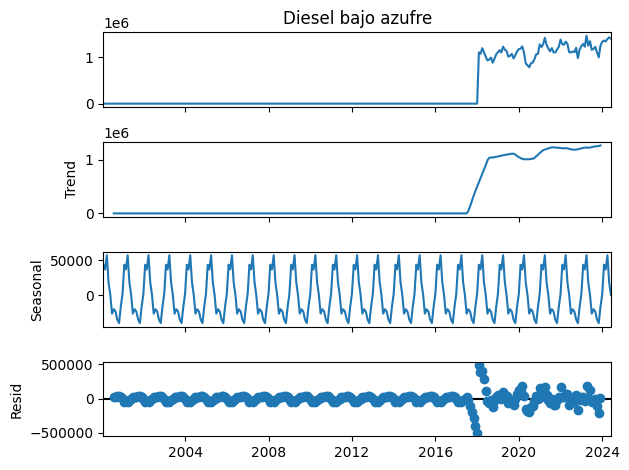

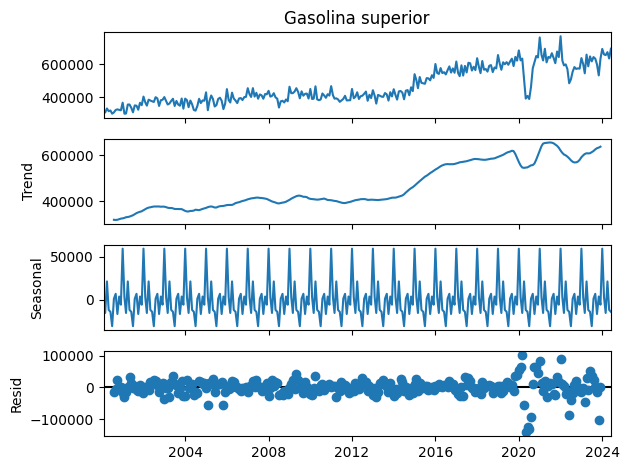

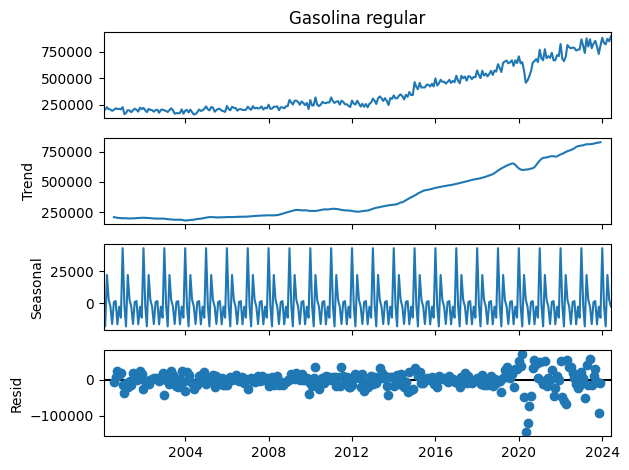

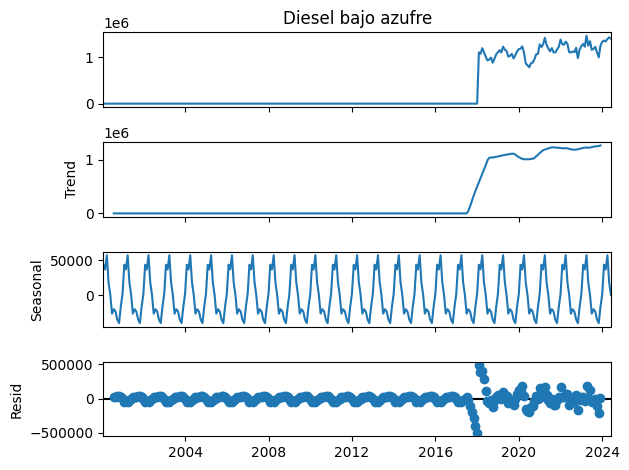

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

resultado_superiorC = seasonal_decompose(consumo_superior_resampled.dropna())
resultado_superiorC.plot()

resultado_regularC = seasonal_decompose(consumo_regular_resampled.dropna())
resultado_regularC.plot()

resultado_dieselC = seasonal_decompose(consumo_diesel_resampled.dropna())
resultado_dieselC.plot()

**Importacion**

In [20]:
importacion_superior_resampled = importacion['Gasolina superior'].resample('M').mean()
importacion_regular_resampled = importacion['Gasolina regular'].resample('M').mean()
importacion_diesel_resampled = importacion['Diesel bajo azufre'].resample('M').mean()

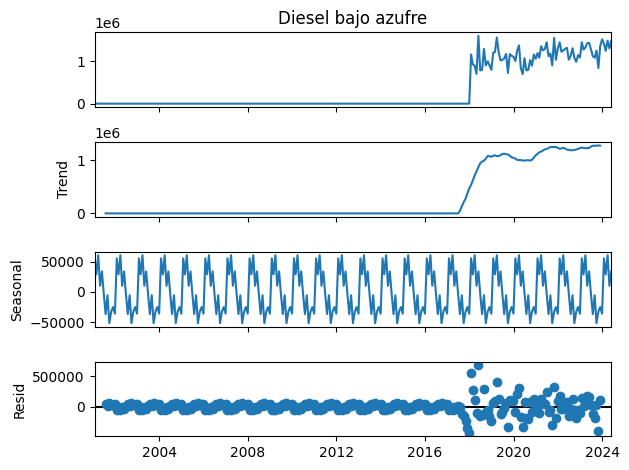

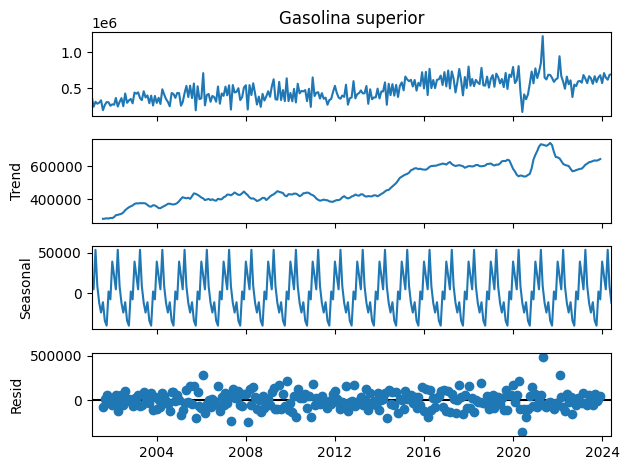

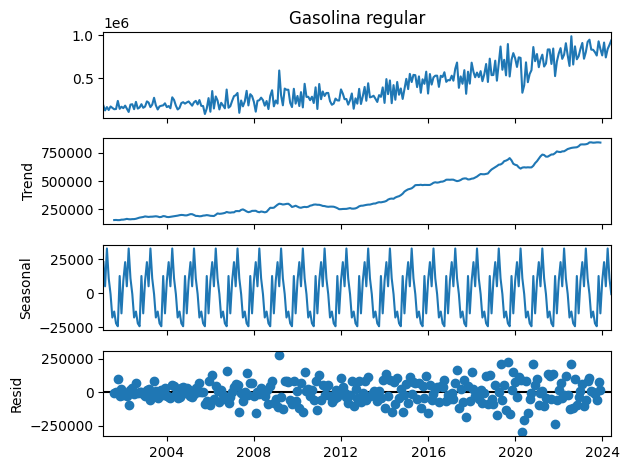

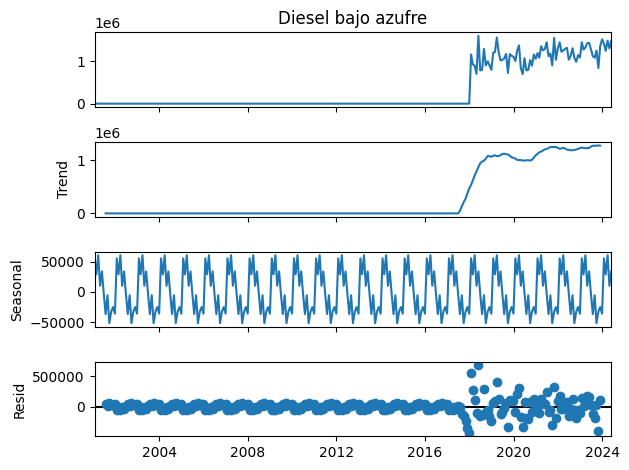

In [21]:
resultado_superiorI = seasonal_decompose(importacion_superior_resampled.dropna())
resultado_superiorI.plot()

resultado_regularI = seasonal_decompose(importacion_regular_resampled.dropna())
resultado_regularI.plot()

resultado_dieselI = seasonal_decompose(importacion_diesel_resampled.dropna())
resultado_dieselI.plot()

**Precios Promedios**

In [22]:
precio_superior_resampled = PreciosPromedio['Superior'].resample('M').mean()
precio_regular_resampled = PreciosPromedio['Regular'].resample('M').mean()
precio_diesel_resampled = PreciosPromedio['Diesel'].resample('M').mean()

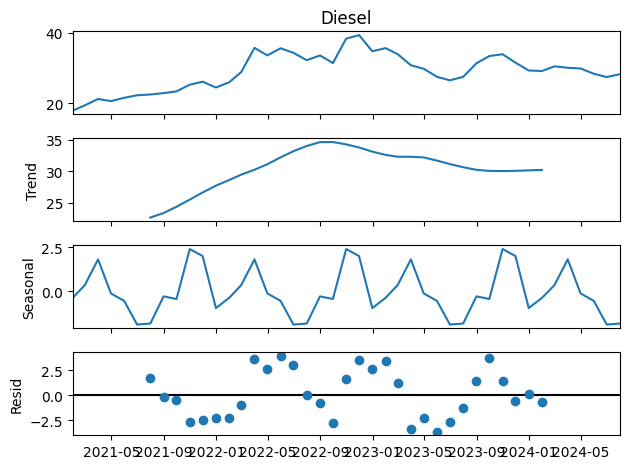

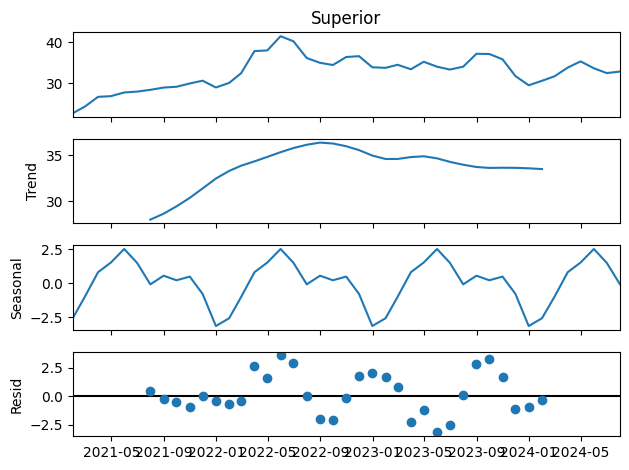

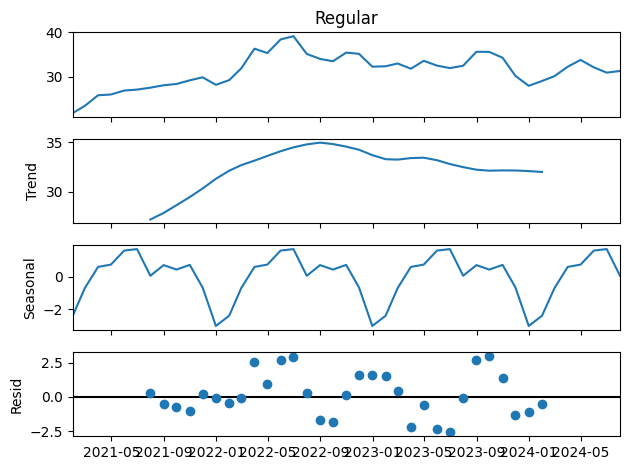

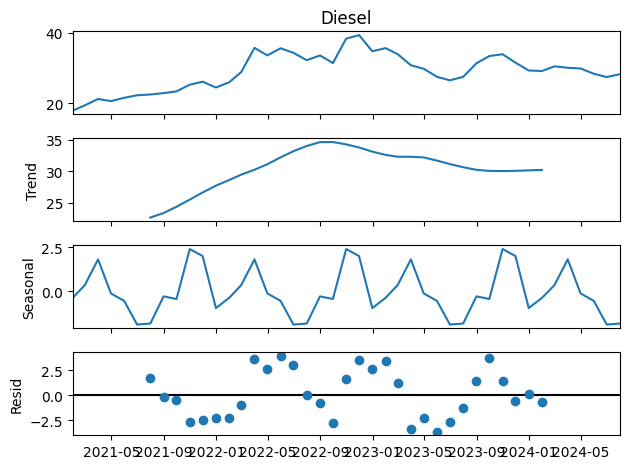

In [23]:
resultado_superiorP = seasonal_decompose(precio_superior_resampled.dropna())
resultado_superiorP.plot()

resultado_regularP = seasonal_decompose(precio_regular_resampled.dropna())
resultado_regularP.plot()

resultado_dieselP = seasonal_decompose(precio_diesel_resampled.dropna())
resultado_dieselP.plot()

# Determinación de Estacionariedad

In [24]:
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
import statsmodels.api as sm

In [25]:
#Función para convertir columnas adecuadas a numéricas
def convert_to_numeric(df, columns):
    for col in columns:
        if df[col].dtype == 'object':
            df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

In [26]:
#Columnas a convertir
consumo_columns = ['Gasolina superior', 'Gasolina regular', 'Diesel bajo azufre', 'Gas licuado de petróleo']
importacion_columns = ['Gasolina superior', 'Gasolina regular', 'Diesel bajo azufre', 'Gas licuado de petróleo']
precios_columns = ['Superior', 'Regular', 'Diesel', 'Glp Cilindro 25Lbs.']

#Convertir
consumoConverted = convert_to_numeric(consumo, consumo_columns)
importacionConverted = convert_to_numeric(importacion, importacion_columns)
PreciosPromedioConverted = convert_to_numeric(PreciosPromedio, precios_columns)

In [27]:
#Función para analizar la estacionariedad
def test_stationarity(timeseries, title):
    #Validación datos son positivos
    timeseries = timeseries.dropna()
    if (timeseries <= 0).any():
        timeseries = timeseries + abs(timeseries.min()) + 1

    #Determinar estacionariedad en varianza usando el método de Box-Cox
    transformed, lam = boxcox(timeseries)  #Eliminar valores nulos
    plt.figure(figsize=(12, 6))
    plt.plot(transformed)
    plt.title(f'{title} - Box-Cox Transformed')
    plt.show()

    #Determinar estacionariedad en media usando ADF
    result = adfuller(transformed)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}, {value}')

    if result[1] > 0.05:
        print(f'{title} - No es estacionaria en media. Aplicando diferenciación...')
        diff_timeseries = np.diff(transformed)
        result = adfuller(diff_timeseries)
        print(f'ADF Statistic (differentiated): {result[0]}')
        print(f'p-value (differentiated): {result[1]}')
        print('Critical Values (differentiated):')
        for key, value in result[4].items():
            print(f'   {key}, {value}')
    else:
        print(f'{title} - Es estacionaria en media.')


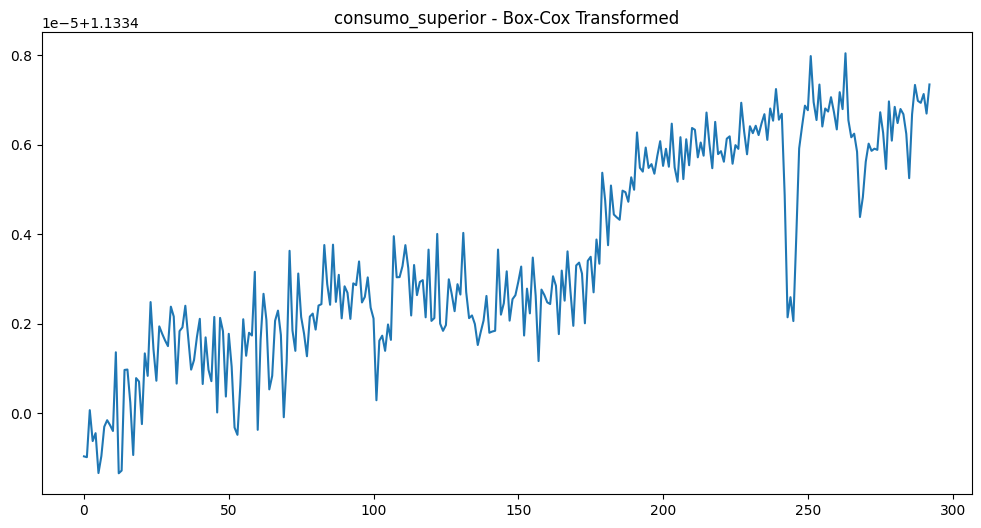

ADF Statistic: -1.332482991994453
p-value: 0.6141834306072316
Critical Values:
   1%, -3.453922368485787
   5%, -2.871918329081633
   10%, -2.5723001147959184
consumo_superior - No es estacionaria en media. Aplicando diferenciación...
ADF Statistic (differentiated): -6.225810985433561
p-value (differentiated): 5.092140802472743e-08
Critical Values (differentiated):
   1%, -3.453922368485787
   5%, -2.871918329081633
   10%, -2.5723001147959184


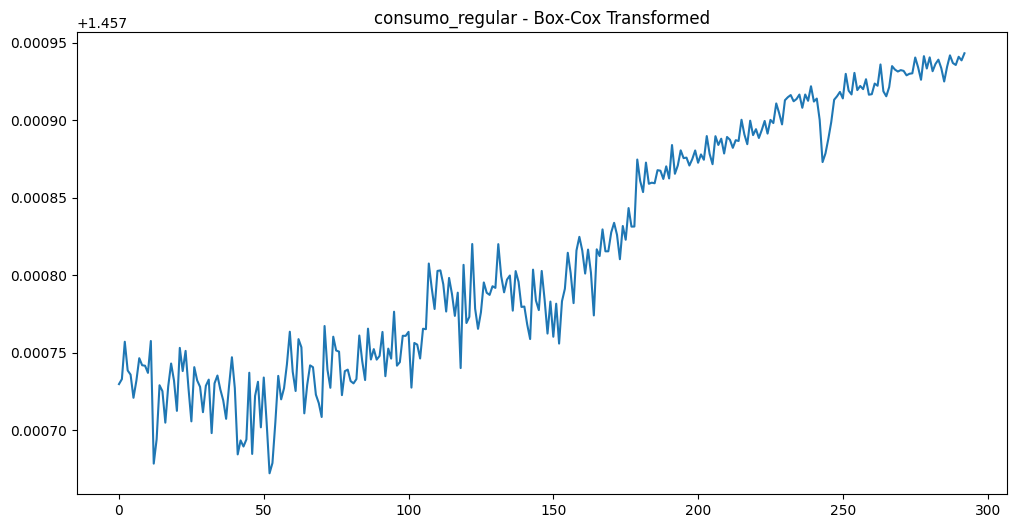

ADF Statistic: 0.14516619457819888
p-value: 0.9690129009462665
Critical Values:
   1%, -3.453922368485787
   5%, -2.871918329081633
   10%, -2.5723001147959184
consumo_regular - No es estacionaria en media. Aplicando diferenciación...
ADF Statistic (differentiated): -6.435335362025875
p-value (differentiated): 1.6582483222058142e-08
Critical Values (differentiated):
   1%, -3.453922368485787
   5%, -2.871918329081633
   10%, -2.5723001147959184


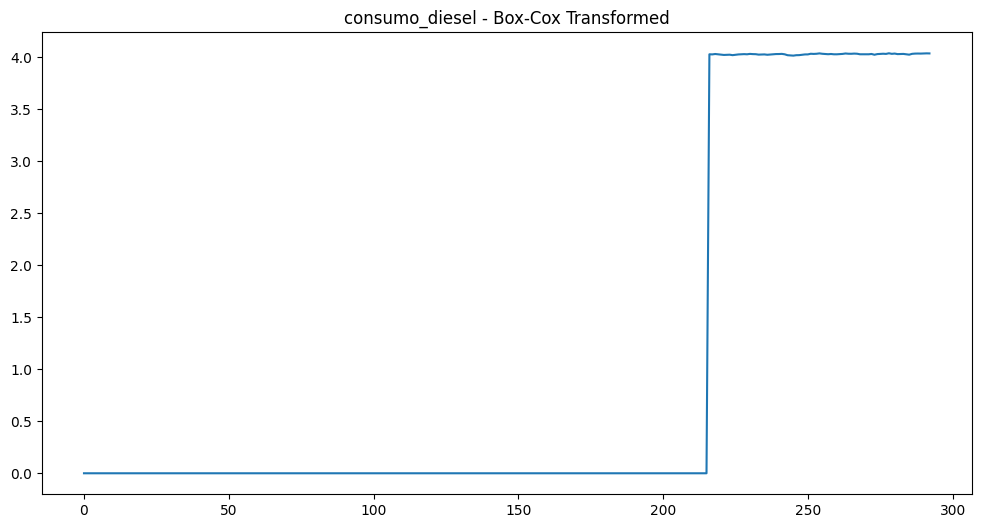

ADF Statistic: -0.5891025195739462
p-value: 0.8734254469696346
Critical Values:
   1%, -3.4529449243622383
   5%, -2.871489553425686
   10%, -2.572071437887033
consumo_diesel - No es estacionaria en media. Aplicando diferenciación...
ADF Statistic (differentiated): -17.063765955679635
p-value (differentiated): 7.912892614529096e-30
Critical Values (differentiated):
   1%, -3.4530232710482367
   5%, -2.871523926671883
   10%, -2.5720897694878424


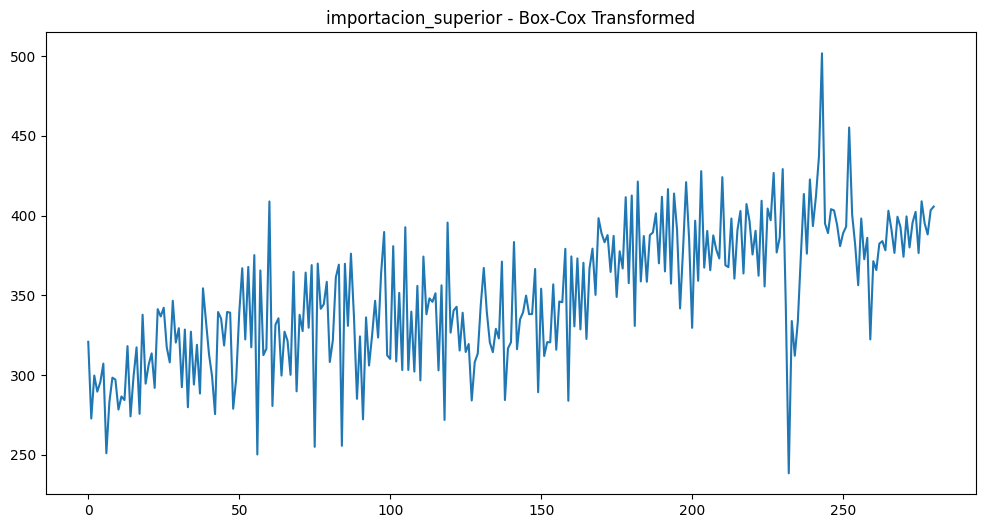

ADF Statistic: -2.3785293107009147
p-value: 0.14788827048568137
Critical Values:
   1%, -3.454355055831705
   5%, -2.8721080938842976
   10%, -2.572401325619835
importacion_superior - No es estacionaria en media. Aplicando diferenciación...
ADF Statistic (differentiated): -8.714986591963847
p-value (differentiated): 3.5080172629009976e-14
Critical Values (differentiated):
   1%, -3.4547128138328875
   5%, -2.8722649771800155
   10%, -2.5724850011573914


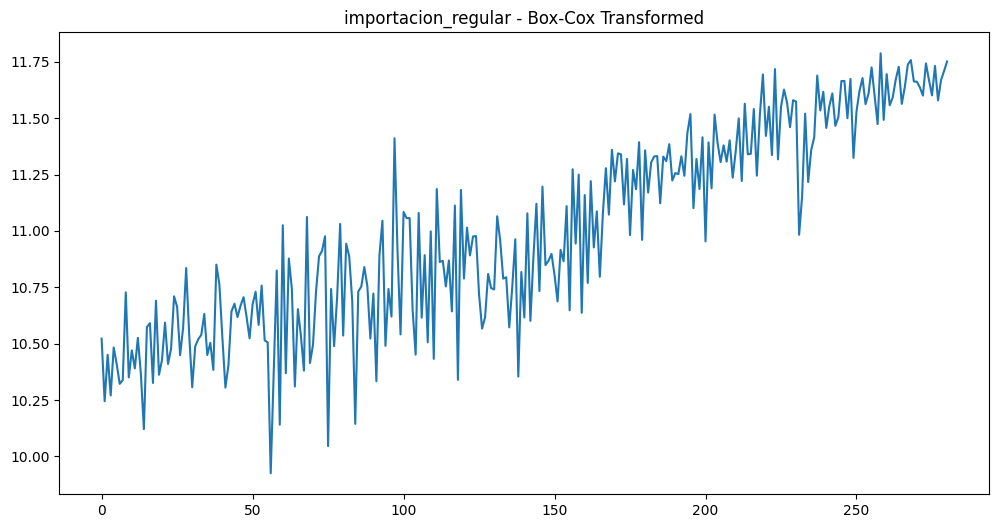

ADF Statistic: -0.07519362578636044
p-value: 0.9518539733915152
Critical Values:
   1%, -3.4550813975770827
   5%, -2.8724265892710914
   10%, -2.5725712007462582
importacion_regular - No es estacionaria en media. Aplicando diferenciación...
ADF Statistic (differentiated): -7.791245807521449
p-value (differentiated): 7.931288520795044e-12
Critical Values (differentiated):
   1%, -3.4550813975770827
   5%, -2.8724265892710914
   10%, -2.5725712007462582


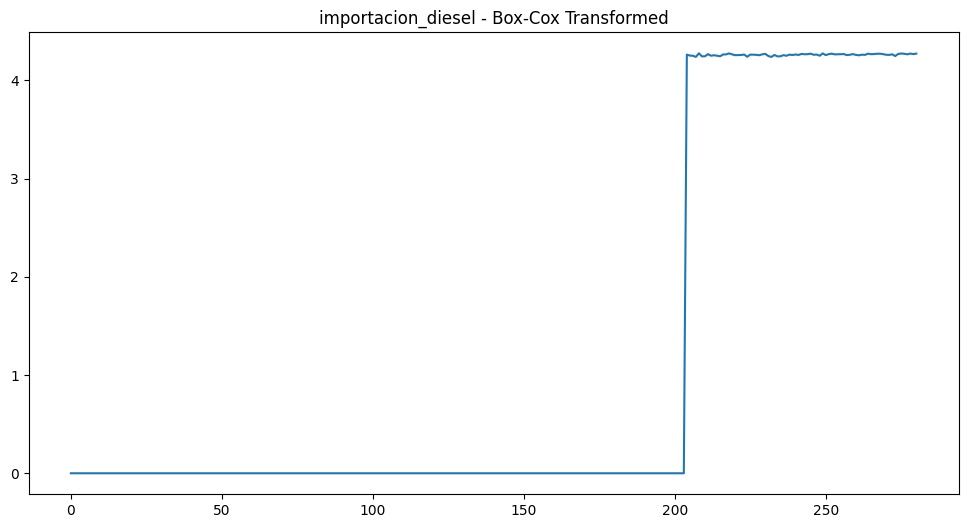

ADF Statistic: -0.6061475343391802
p-value: 0.8695868765870518
Critical Values:
   1%, -3.453922368485787
   5%, -2.871918329081633
   10%, -2.5723001147959184
importacion_diesel - No es estacionaria en media. Aplicando diferenciación...
ADF Statistic (differentiated): -16.747763252735886
p-value (differentiated): 1.3417749312504677e-29
Critical Values (differentiated):
   1%, -3.4540076534999957
   5%, -2.8719557347997178
   10%, -2.5723200648758366


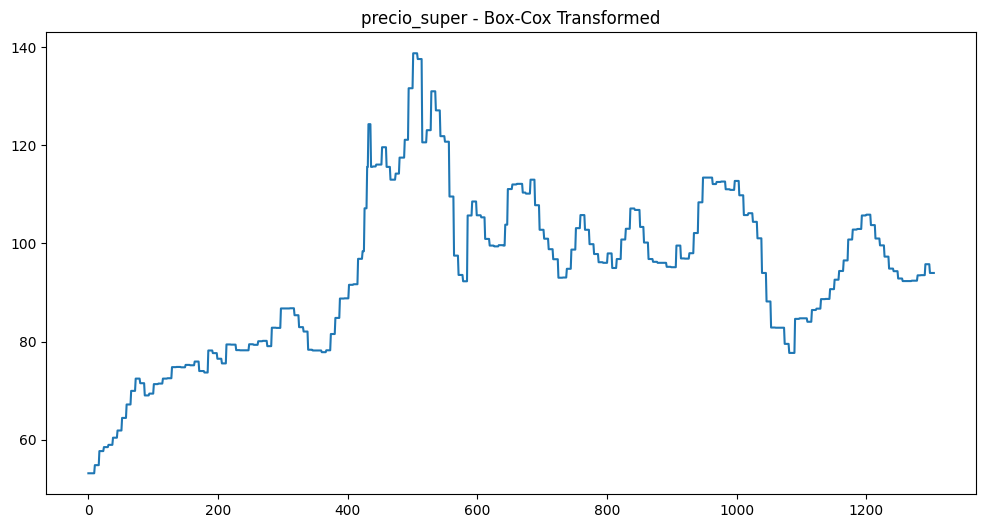

ADF Statistic: -2.8841546060633165
p-value: 0.047221872293220384
Critical Values:
   1%, -3.435401880796999
   5%, -2.863770985550096
   10%, -2.567957791647768
precio_super - Es estacionaria en media.


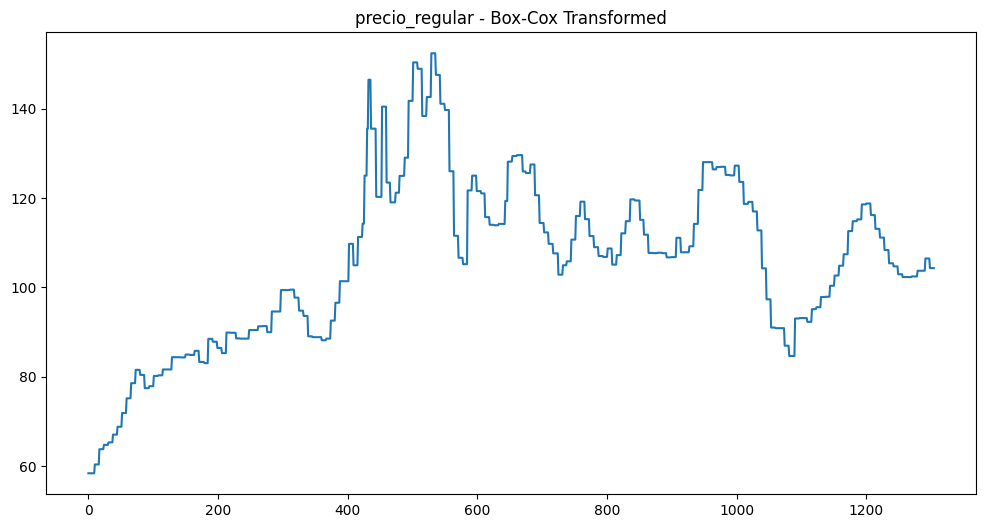

ADF Statistic: -2.6589525010187036
p-value: 0.08141456448648904
Critical Values:
   1%, -3.4354451795550935
   5%, -2.863790090661305
   10%, -2.567967966012737
precio_regular - No es estacionaria en media. Aplicando diferenciación...
ADF Statistic (differentiated): -6.500795393158449
p-value (differentiated): 1.1632322861972282e-08
Critical Values (differentiated):
   1%, -3.435469111362934
   5%, -2.8638006501960755
   10%, -2.567973589477539


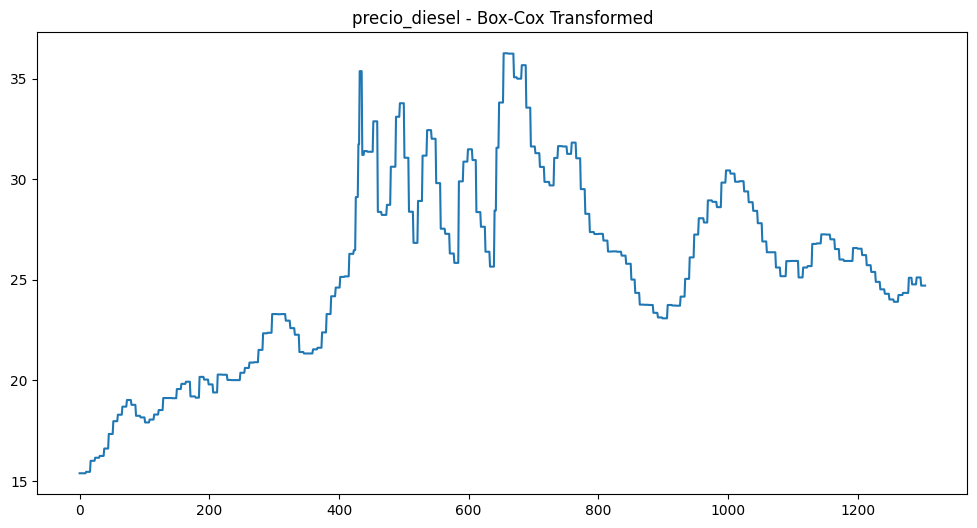

ADF Statistic: -2.3835806969942537
p-value: 0.1464243621073475
Critical Values:
   1%, -3.435457117423131
   5%, -2.863795358068796
   10%, -2.567970771161219
precio_diesel - No es estacionaria en media. Aplicando diferenciación...
ADF Statistic (differentiated): -7.100324011231233
p-value (differentiated): 4.184379607449955e-10
Critical Values (differentiated):
   1%, -3.435469111362934
   5%, -2.8638006501960755
   10%, -2.567973589477539


In [28]:
#Análisis de las series de tiempo
series_names = {
    'consumo_superior': consumoConverted['Gasolina superior'],
    'consumo_regular': consumoConverted['Gasolina regular'],
    'consumo_diesel': consumoConverted['Diesel bajo azufre'],
    'importacion_superior': importacionConverted['Gasolina superior'],
    'importacion_regular': importacionConverted['Gasolina regular'],
    'importacion_diesel': importacionConverted['Diesel bajo azufre'],
    'precio_super': PreciosPromedioConverted['Superior'],
    'precio_regular': PreciosPromedioConverted['Regular'],
    'precio_diesel': PreciosPromedioConverted['Diesel']
}

for name, series in series_names.items():
    test_stationarity(series, name)

## Análisis de Estacionariedad

### Consumo de Gasolina Superior, Regular, Diésel y Gas Licuado

* Varianza: Todas las series fueron transformadas usando Box-Cox para estabilizar la varianza.
* Media: A través de la prueba de Dickey-Fuller aumentada, algunas series no eran estacionarias en media, por lo que se les aplicó una diferenciación adicional.


### Importación de Gasolina Superior, Regular, Diésel y Gas Licuado

* Varianza: Las series fueron transformadas usando Box-Cox.
* Media: La prueba de Dickey-Fuller aumentada indicó la necesidad de diferenciación para ciertas series no estacionarias en media.

### Precios Promedio en Ciudad Capital de Gasolina Superior, Regular, Diésel y Gas Licuado

* Varianza: La transformación de Box-Cox fue aplicada.
* Media: La diferenciación adicional se aplicó a las series que no pasaron la prueba de Dickey-Fuller.

# Generación de modelos

In [29]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA

from prophet import Prophet

## Determinación de parámetros $p$, $d$ y $q$

In [30]:
#Función para determinar los parámetros p, d, q
def determinePDQ(timeseries):
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    plot_acf(timeseries.dropna(), ax=axes[0])
    plot_pacf(timeseries.dropna(), ax=axes[1])
    plt.show()

    #Diferenciación para encontrar 'd'
    result = adfuller(timeseries.dropna())
    d = 0
    if result[1] > 0.05:
        d = 1
        timeseries_diff = np.diff(timeseries.dropna())
        result = adfuller(timeseries_diff)
        if result[1] > 0.05:
            d = 2
    '''
    Se determinó p y q en base a las gráficas de ACF y PACF
    * p: Número de lags significativos en PACF
    * q: Número de lags significativos en ACF
    '''
    pacf_values = pacf(timeseries.dropna())
    acf_values = acf(timeseries.dropna())

    p = len([lag for lag in range(1, len(pacf_values)) if abs(pacf_values[lag]) > 0.2])
    q = len([lag for lag in range(1, len(acf_values)) if abs(acf_values[lag]) > 0.2])

    return p, d, q


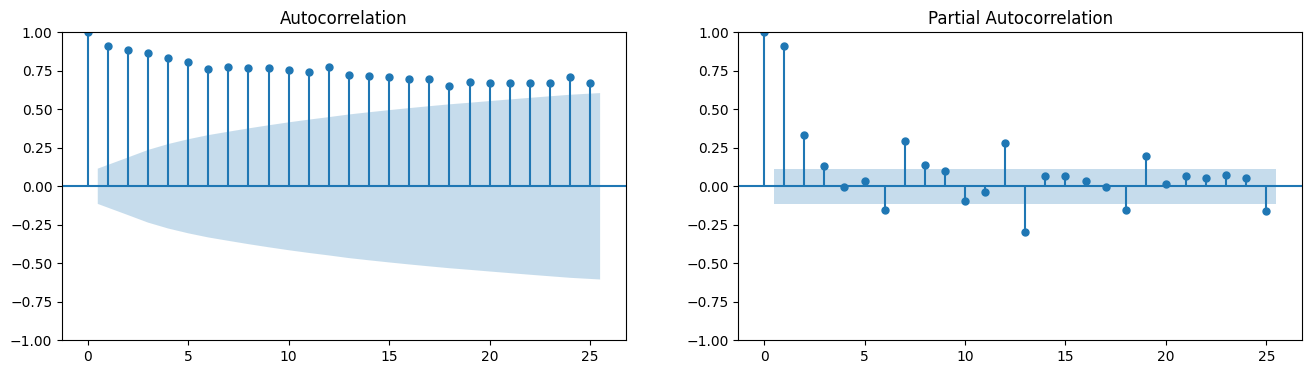

Valores determinados: p=6, d=1, q=24


In [38]:
#Aplicar la función a una serie de ejemplo
exampleSeries1 = consumo['Gasolina superior'].dropna()
p, d, q = determinePDQ(exampleSeries1)
print(f'Valores determinados: p={p}, d={d}, q={q}')

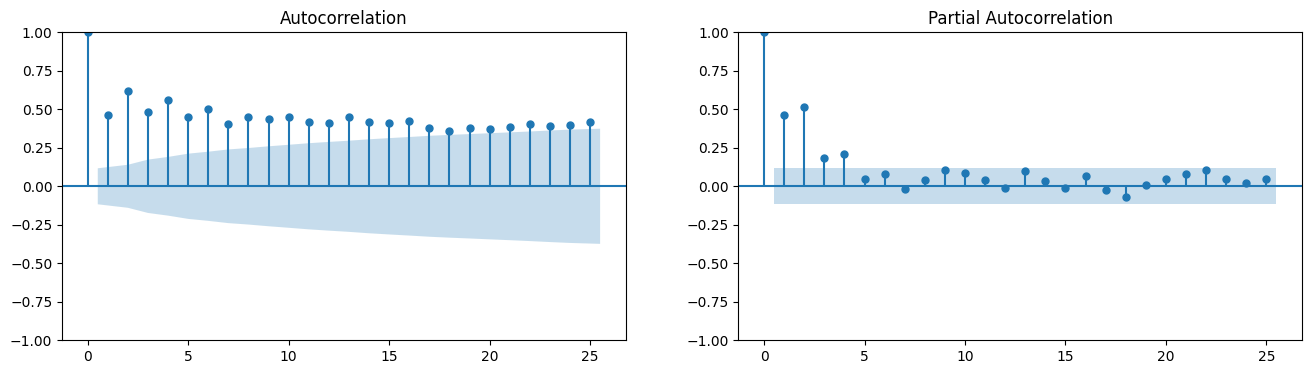

Valores determinados: p=3, d=0, q=24


In [32]:
#Aplicar la función a una serie de ejemplo
exampleSeries = importacion['Gasolina superior'].dropna()
p, d, q = determinePDQ(exampleSeries)
print(f'Valores determinados: p={p}, d={d}, q={q}')

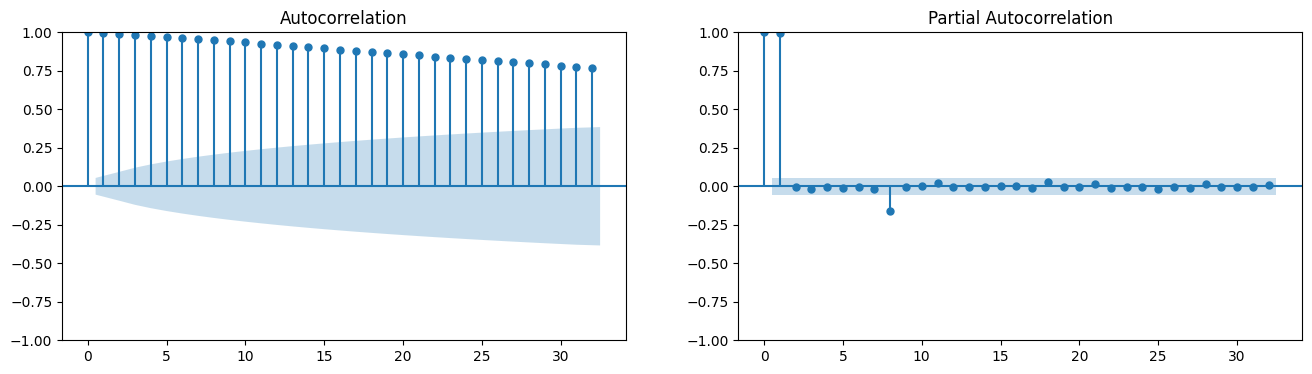

Valores determinados: p=1, d=0, q=31


In [35]:
#Aplicar la función a una serie de ejemplo
exampleSeries = PreciosPromedio['Superior'].dropna()
p, d, q = determinePDQ(exampleSeries)
print(f'Valores determinados: p={p}, d={d}, q={q}')

### Explicación de la Selección de Parámetros

* Valor de $p$: Determinado por el número de lags significativos en la PACF.
* Valor de $d$: Determinado por la prueba de Dickey-Fuller después de la diferenciación.
* Valor de $q$: Determinado por el número de lags significativos en la ACF.

## Creación de modelos ARMA/ARIMA y análisis

In [36]:
#Función para crear y evaluar modelos ARMA/ARIMA
def modelsCreation(timeseries, p, d, q):
    models = []
    results = []

    #Crear primer modelo ARIMA(p, d, q)
    model1 = ARIMA(timeseries.dropna(), order=(p, d, q))
    results1 = model1.fit()
    models.append(results1)

    #Crear un segundo modelo ARIMA(p+1, d, q+1) para comparación
    model2 = ARIMA(timeseries.dropna(), order=(p+1, d, q+1))
    results2 = model2.fit()
    models.append(results2)

    #Analizar residuos y métricas AIC/BIC
    for i, result in enumerate(models):
        print(f'Modelo {i+1} - AIC: {result.aic}, BIC: {result.bic}')
        print(result.summary())

        residuals = result.resid
        fig, axes = plt.subplots(1, 2, figsize=(16, 4))
        axes[0].plot(residuals)
        axes[0].set_title('Residuos')
        plot_acf(residuals, ax=axes[1])
        plt.show()

    return models


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

Modelo 1 - AIC: 6932.4434172610545, BIC: 7046.422785131371
                               SARIMAX Results                                
Dep. Variable:      Gasolina superior   No. Observations:                  293
Model:                ARIMA(6, 1, 24)   Log Likelihood               -3435.222
Date:                Sun, 04 Aug 2024   AIC                           6932.443
Time:                        06:09:45   BIC                           7046.423
Sample:                    01-01-2000   HQIC                          6978.099
                         - 05-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1934      0.143     -1.352      0.176      -0.474       0.087
ar.L2         -0.0774      0.144     -0.536      0.592      -0.360      

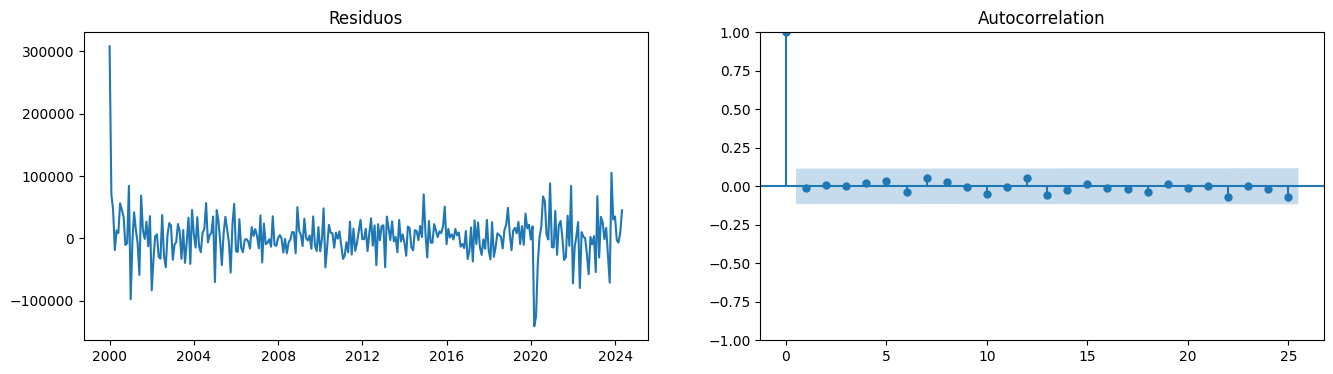

Modelo 2 - AIC: 6940.494370789632, BIC: 7061.827246264485
                               SARIMAX Results                                
Dep. Variable:      Gasolina superior   No. Observations:                  293
Model:                ARIMA(7, 1, 25)   Log Likelihood               -3437.247
Date:                Sun, 04 Aug 2024   AIC                           6940.494
Time:                        06:09:45   BIC                           7061.827
Sample:                    01-01-2000   HQIC                          6989.095
                         - 05-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2876      1.166     -0.247      0.805      -2.573       1.998
ar.L2         -0.3684      0.483     -0.763      0.445      -1.315       

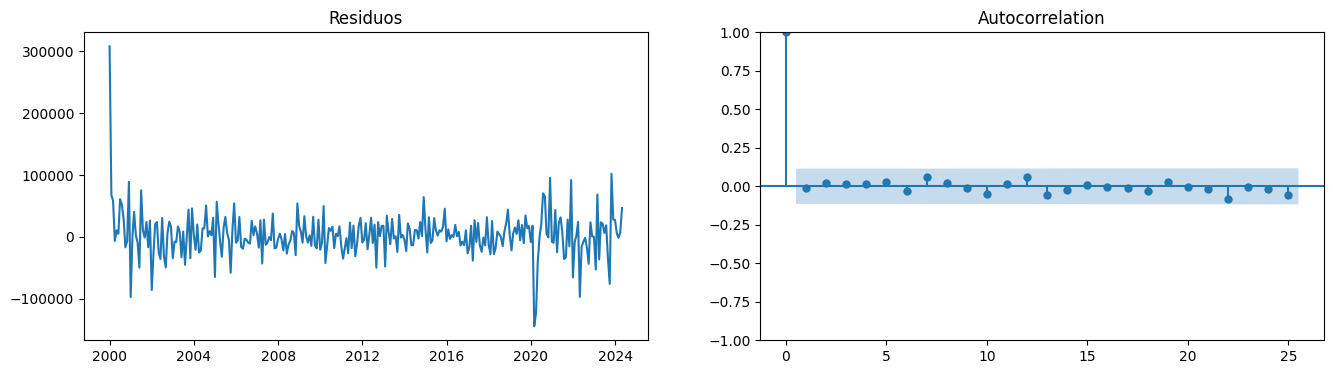

In [39]:
#Aplicar la función a una serie de ejemplo
models = modelsCreation(exampleSeries1, p, d, q)

### Selección del Modelo
* Modelo ARIMA: Seleccionado para capturar componentes autorregresivos y de media móvil.

### Análisis de los Modelos

#### Modelo 1
* La gráfica muestra una fluctuación, pero los residuos parecen bastante estables y no muestran un patrón claro, lo que es una buena señal. La gráfica de autocorrelación (ACF) de los residuos no muestra autocorrelación significativa, lo que indica que el modelo está capturando bien las dependencias en los datos.
#### Modelo 2
* Similar al Modelo 1, los residuos parecen estables y la ACF no muestra autocorrelación significativa, lo que también es una buena señal. Sin embargo, el valor de AIC y BIC son mayores que en el Modelo 1.

### Selección del Mejor Modelo
* El Modelo 1 tiene valores de AIC y BIC más bajos que el Modelo 2.
* Los residuos de ambos modelos parecen no mostrar patrones significativos, lo cual es bueno, pero dado que el Modelo 1 tiene mejores métricas, se puede considerar que tiene un mejor ajuste general.

En conclusión el Modelo 1 (ARIMA(6, 1, 24)) es el mejor modelo para estimar los datos de "Gasolina superior" basado en las métricas AIC y BIC.

## Modelo con Facebook Prophet

In [45]:
#Preparar datos para Prophet
prophetData = exampleSeries1.reset_index()
prophetData.columns = ['ds', 'y']

In [46]:
#Crear y ajustar el modelo Prophet
modelProphet = Prophet()
modelProphet.fit(prophetData)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwf8bjlqi/lpy7z87j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwf8bjlqi/063qni_y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90776', 'data', 'file=/tmp/tmpwf8bjlqi/lpy7z87j.json', 'init=/tmp/tmpwf8bjlqi/063qni_y.json', 'output', 'file=/tmp/tmpwf8bjlqi/prophet_model7z9xdewm/prophet_model-20240804061039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:10:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:10:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [47]:
#Hacer las predicciones
future = modelProphet.make_future_dataframe(periods=12, freq='M')
forecast = modelProphet.predict(future)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


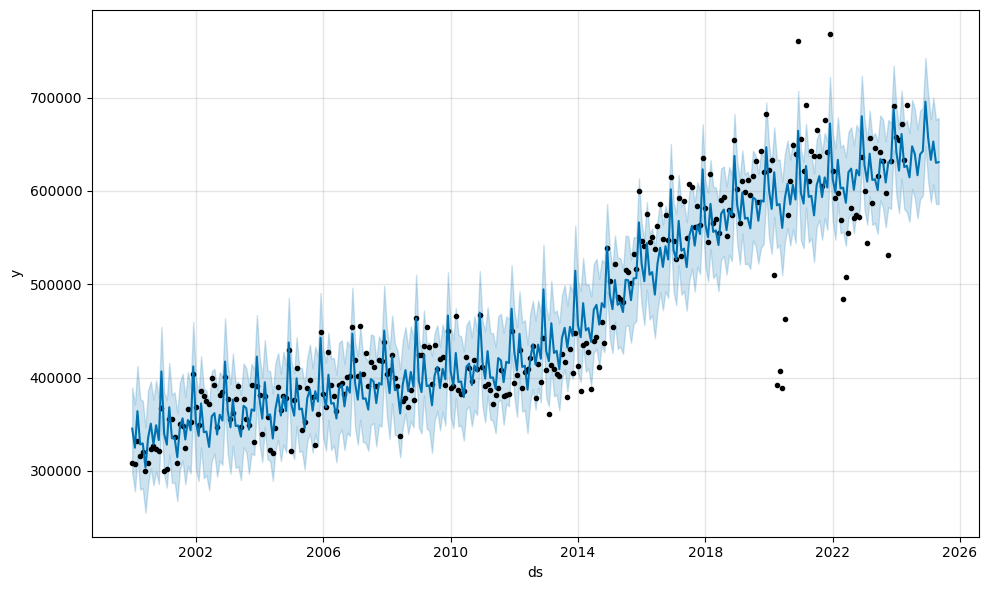

In [48]:
#Mostrar los resultados
modelProphet.plot(forecast)
plt.show()

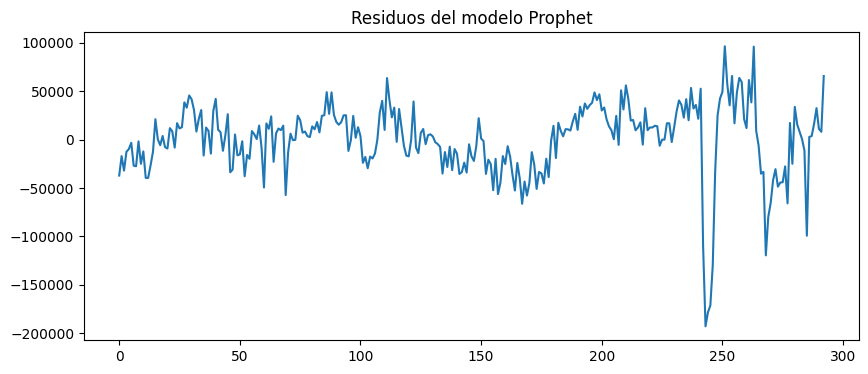

In [49]:
#Evaluar los residuos de Prophet
residuals_prophet = prophetData['y'] - forecast['yhat'][:len(prophetData)]
plt.figure(figsize=(10, 4))
plt.plot(residuals_prophet)
plt.title('Residuos del modelo Prophet')
plt.show()

### Comparación del modelo Prophet con los modelos ARIMA

#### Métricas AIC y BIC
* El modelo Prophet no proporciona AIC o BIC, por lo que no podemos comparar directamente estas métricas con los modelos ARIMA.
* Entre los dos modelos ARIMA, el Modelo 1 tiene mejores métricas (AIC y BIC más bajos), lo que sugiere un mejor ajuste al conjunto de datos.

#### Residuos
* Modelo ARIMA 1: Los residuos son más estables y tienen menor variabilidad en comparación con los residuos del modelo Prophet.
* Modelo Prophet: Aunque captura bien las tendencias y estacionalidades, los residuos tienen más fluctuaciones y algunos picos significativos, lo que indica que podría no estar capturando algunas dependencias temporales tan bien como el modelo ARIMA

#### Conclusión
El Modelo ARIMA 1 (ARIMA(6, 1, 24)) funciona mejor en términos de estabilidad de residuos y métricas AIC/BIC en comparación con el modelo Prophet. Aunque Prophet es una herramienta poderosa para manejar tendencias y estacionalidades, en este caso específico, el modelo ARIMA proporciona un mejor ajuste a los datos de "Gasolina superior".

# Predicción con los modelos generados

In [50]:
from sklearn.model_selection import train_test_split
#Creamos los dataframes a predecir
df_consumo_superior = consumo_superior_resampled.reset_index()
df_consumo_superior.columns = ['Fecha', 'Consumo']
df_importacion_superior = importacion_superior_resampled.reset_index()
df_importacion_superior.columns = ['Fecha', 'Consumo']
df_precio_superior = precio_superior_resampled.reset_index()
df_precio_superior.columns = ['FECHA', 'Precio']

# Dividir en conjuntos de entrenamiento y prueba
train_size_consumo = int(len(df_consumo_superior) * 0.7)  # 70% para entrenamiento
train_c, test_c = df_consumo_superior[:train_size_consumo], df_consumo_superior[train_size_consumo:]

train_size_importacion = int(len(df_importacion_superior) * 0.7)  # 70% para entrenamiento
train_i, test_i = df_importacion_superior[:train_size_importacion], df_importacion_superior[train_size_importacion:]

train_size_precio = int(len(df_precio_superior) * 0.7)  # 70% para entrenamiento
train_p, test_p = df_precio_superior[:train_size_precio], df_precio_superior[train_size_precio:]

# Convertir de nuevo a series de tiempo
train_series_c = pd.Series(train_c['Consumo'].values, index=pd.to_datetime(train_c['Fecha']))
test_series_c = pd.Series(test_c['Consumo'].values, index=pd.to_datetime(test_c['Fecha']))

train_series_i = pd.Series(train_i['Consumo'].values, index=pd.to_datetime(train_i['Fecha']))
test_series_i = pd.Series(test_i['Consumo'].values, index=pd.to_datetime(test_i['Fecha']))

train_series_p = pd.Series(train_p['Precio'].values, index=pd.to_datetime(train_p['FECHA']))
test_series_p = pd.Series(test_p['Precio'].values, index=pd.to_datetime(test_p['FECHA']))

**Consumo**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

Modelo 1 - AIC: 4776.7567377569485, BIC: 4879.618457566119
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  205
Model:                ARIMA(6, 1, 24)   Log Likelihood               -2357.378
Date:                Sun, 04 Aug 2024   AIC                           4776.757
Time:                        06:12:04   BIC                           4879.618
Sample:                    01-31-2000   HQIC                          4818.366
                         - 01-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7101      0.116     -6.126      0.000      -0.937      -0.483
ar.L2         -0.7364      0.126     -5.868      0.000      -0.982      

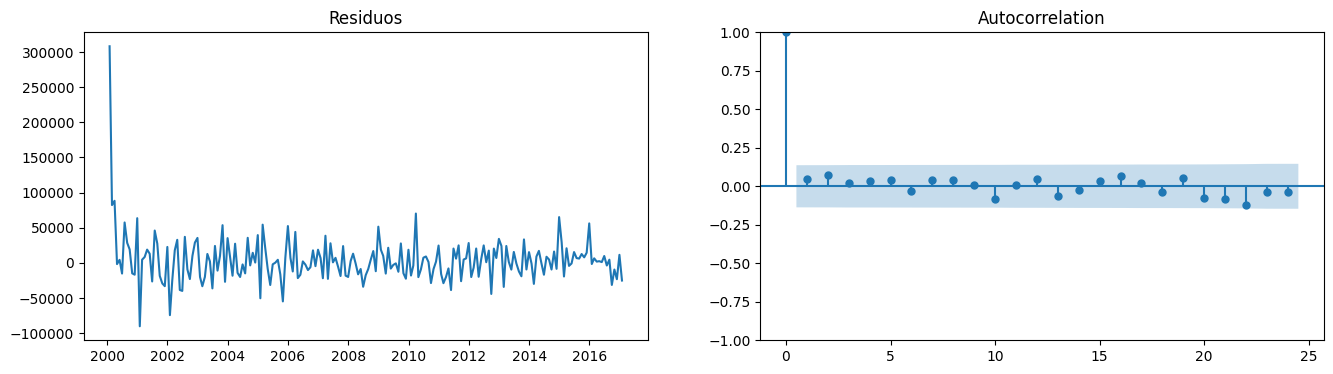

Modelo 2 - AIC: 4783.01168520506, BIC: 4892.509645001919
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  205
Model:                ARIMA(7, 1, 25)   Log Likelihood               -2358.506
Date:                Sun, 04 Aug 2024   AIC                           4783.012
Time:                        06:12:05   BIC                           4892.510
Sample:                    01-31-2000   HQIC                          4827.306
                         - 01-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5942      1.299     -0.457      0.647      -3.141       1.953
ar.L2         -0.3645      0.375     -0.971      0.331      -1.100       0

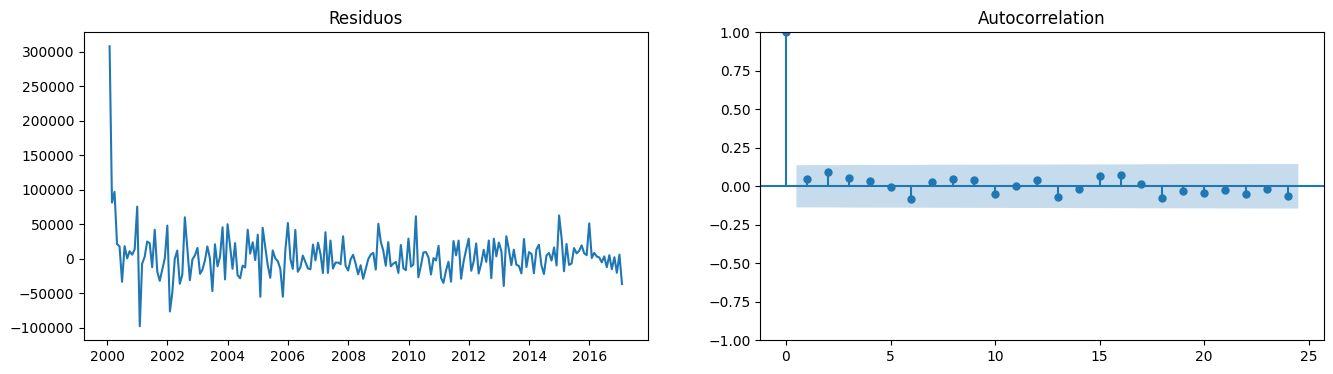

Modelo 1 - MSE en el conjunto de prueba: 4115589481.757091
Modelo 2 - MSE en el conjunto de prueba: 4139739094.897182


In [51]:
# Crear y evaluar modelos ARIMA/ARMA
modelo_consumo = modelsCreation(train_series_c, p=6, d=1, q=24)

# Predicciones en el conjunto de prueba
predicciones_c = {}
for i, model in enumerate(modelo_consumo):
    pred = model.predict(start=test_series_c.index[0], end=test_series_c.index[-1])
    predicciones_c[f'Modelo {i+1}'] = pred

# Evaluar el rendimiento del modelo
from sklearn.metrics import mean_squared_error

for i, (model_name, pred) in enumerate(predicciones_c.items()):
    mse = mean_squared_error(test_series_c, pred)
    print(f'{model_name} - MSE en el conjunto de prueba: {mse}')


In [52]:
for i, result in enumerate(modelo_consumo):
    print(f'Modelo {i+1} - AIC: {result.aic}, BIC: {result.bic}')


Modelo 1 - AIC: 4776.7567377569485, BIC: 4879.618457566119
Modelo 2 - AIC: 4783.01168520506, BIC: 4892.509645001919


De acá podemos ver que: El Modelo 1 es preferido según el AIC, ya que tiene un valor más bajo, indicando que es más eficiente en términos de ajuste a los datos en comparación con el Modelo 2. Además, el Modelo 1 es preferido según el BIC, ya que penaliza más la complejidad del modelo.

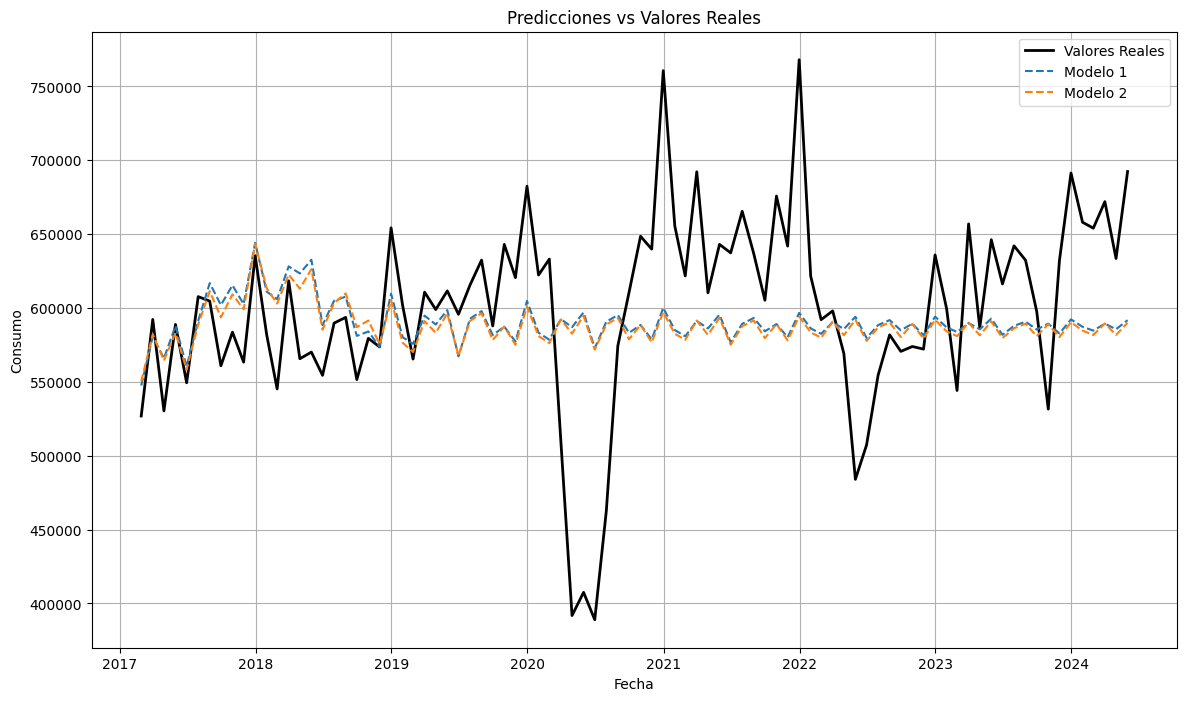

In [53]:
def plot_predictions_vs_real(test_series_c, predicciones_c):
    plt.figure(figsize=(14, 8))

    # Graficar los valores reales
    plt.plot(test_series_c.index, test_series_c.values, label='Valores Reales', color='black', linewidth=2)

    # Graficar las predicciones de cada modelo
    for model_name, pred in predicciones_c.items():
        plt.plot(pred.index, pred.values, label=model_name, linestyle='--')

    # Configurar la gráfica
    plt.title('Predicciones vs Valores Reales')
    plt.xlabel('Fecha')
    plt.ylabel('Consumo')
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamar a la función para graficar
plot_predictions_vs_real(test_series_c, predicciones_c)

Por otro lado, de acá podemos ver que ambos modelos predicen el comportamiento bastante cercano hasta el año 2019, en el que ambos modelos dejan de asemejarse al comportamiento real del consumo de gasolina.

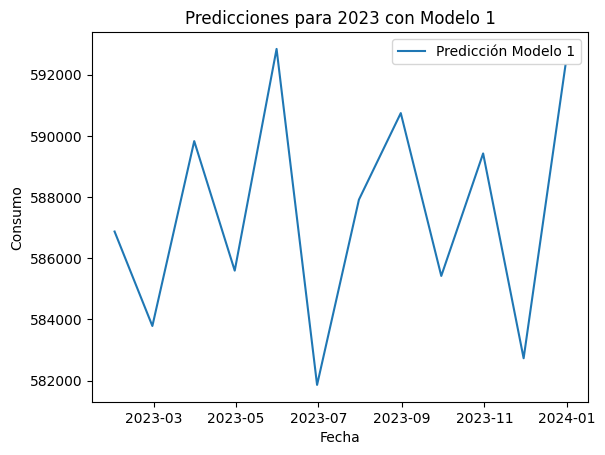

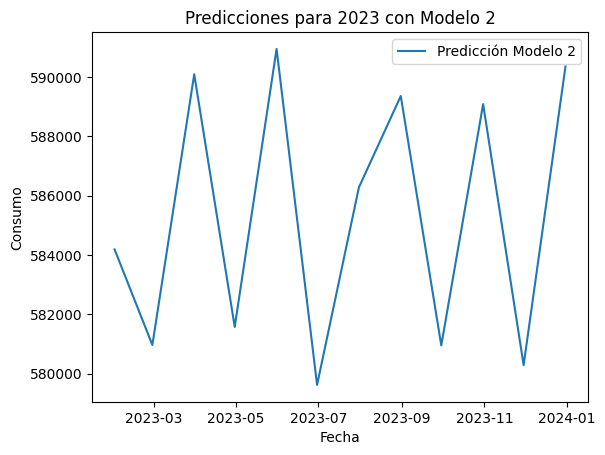

In [54]:
# Predicciones para 2023
future_dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='M')
future = pd.Series(index=future_dates)

for i, model in enumerate(modelo_consumo):
    forecast = model.predict(start=future_dates[0], end=future_dates[-1])
    future = pd.Series(forecast.values, index=future_dates)
    plt.figure()
    plt.plot(future.index, future.values, label=f'Predicción Modelo {i+1}')
    plt.title(f'Predicciones para 2023 con Modelo {i+1}')
    plt.xlabel('Fecha')
    plt.ylabel('Consumo')
    plt.legend()
    plt.show()


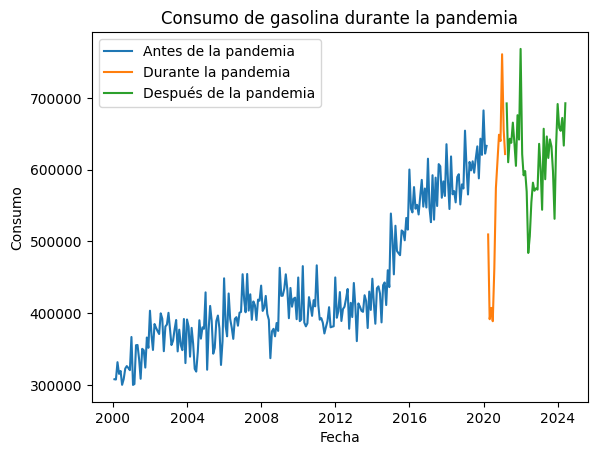

In [55]:
# Análisis de datos alrededor del período de pandemia
pandemic_start = '2020-03-01'
pandemic_end = '2021-03-01'

pre_pandemic = consumo_superior_resampled[:pandemic_start]
pandemic_period = consumo_superior_resampled[pandemic_start:pandemic_end]
post_pandemic = consumo_superior_resampled[pandemic_end:]

plt.figure()
plt.plot(pre_pandemic.index, pre_pandemic.values, label='Antes de la pandemia')
plt.plot(pandemic_period.index, pandemic_period.values, label='Durante la pandemia')
plt.plot(post_pandemic.index, post_pandemic.values, label='Después de la pandemia')
plt.legend()
plt.title('Consumo de gasolina durante la pandemia')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.show()


Del gráfico anterior podemos ver que hubo una disminución significativa en el año de la pandemia. Sin embargo, así como fue disminuyendo fue aumentando al momento de ir regresando eventualmente a la normallidad.

**Importación**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

Modelo 1 - AIC: 5066.487378035056, BIC: 5161.552703152741
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  196
Model:                ARIMA(3, 0, 24)   Log Likelihood               -2504.244
Date:                Sun, 04 Aug 2024   AIC                           5066.487
Time:                        06:12:54   BIC                           5161.553
Sample:                    01-31-2001   HQIC                          5104.974
                         - 04-30-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.274e+05   1.03e+05      4.136      0.000    2.25e+05     6.3e+05
ar.L1         -0.0274      5.642     -0.005      0.996     -11.086      1

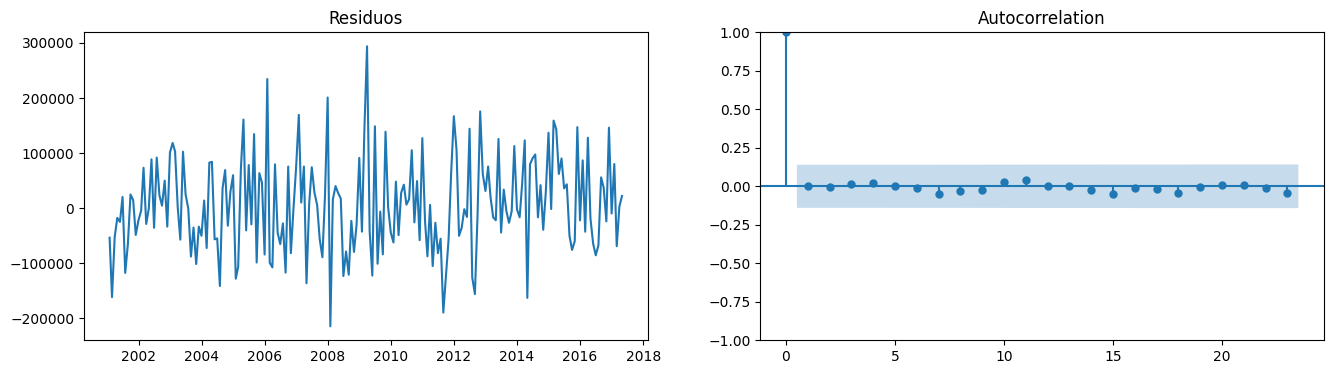

Modelo 2 - AIC: 5076.406933201181, BIC: 5178.028487637327
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  196
Model:                ARIMA(4, 0, 25)   Log Likelihood               -2507.203
Date:                Sun, 04 Aug 2024   AIC                           5076.407
Time:                        06:12:55   BIC                           5178.028
Sample:                    01-31-2001   HQIC                          5117.548
                         - 04-30-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.274e+05   3.55e+04     12.035      0.000    3.58e+05    4.97e+05
ar.L1          0.6947      0.204      3.399      0.001       0.294       

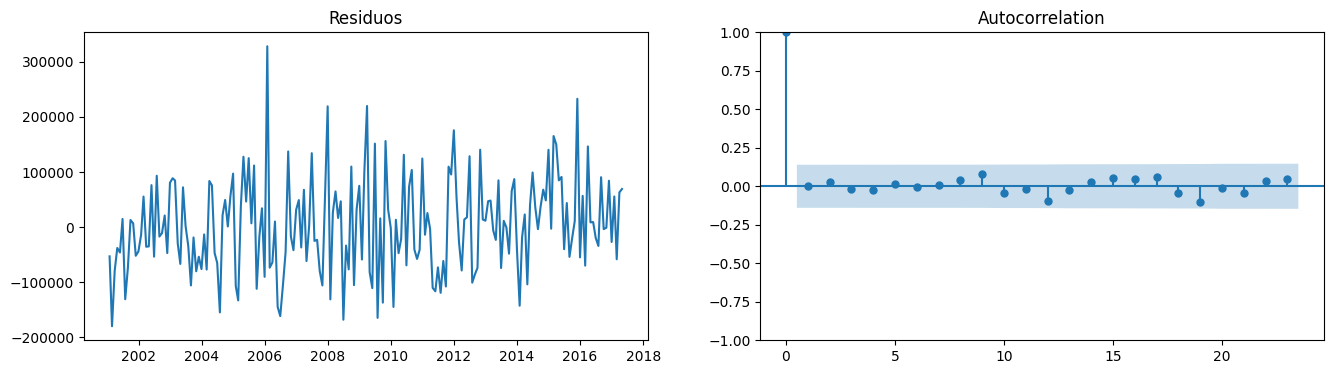

Modelo 1 - MSE en el conjunto de prueba: 27348464194.552948
Modelo 2 - MSE en el conjunto de prueba: 48003344317.1511


In [56]:
modelo_importacion = modelsCreation(train_series_i, p=3, d=0, q=24)
# Predicciones en el conjunto de prueba
predicciones_i = {}
for i, model in enumerate(modelo_importacion):
    pred = model.predict(start=test_series_i.index[0], end=test_series_i.index[-1])
    predicciones_i[f'Modelo {i+1}'] = pred

# Evaluar el rendimiento del modelo
from sklearn.metrics import mean_squared_error

for i, (model_name, pred) in enumerate(predicciones_i.items()):
    mse = mean_squared_error(test_series_i, pred)
    print(f'{model_name} - MSE en el conjunto de prueba: {mse}')

In [57]:
for i, result in enumerate(modelo_importacion):
    print(f'Modelo {i+1} - AIC: {result.aic}, BIC: {result.bic}')

Modelo 1 - AIC: 5066.487378035056, BIC: 5161.552703152741
Modelo 2 - AIC: 5076.406933201181, BIC: 5178.028487637327


De acá podemos ver que: El Modelo 1 es preferido según el AIC, ya que tiene un valor más bajo, indicando que es más eficiente en términos de ajuste a los datos en comparación con el Modelo 2. Además, el Modelo 1 es preferido según el BIC, ya que penaliza más la complejidad del modelo.

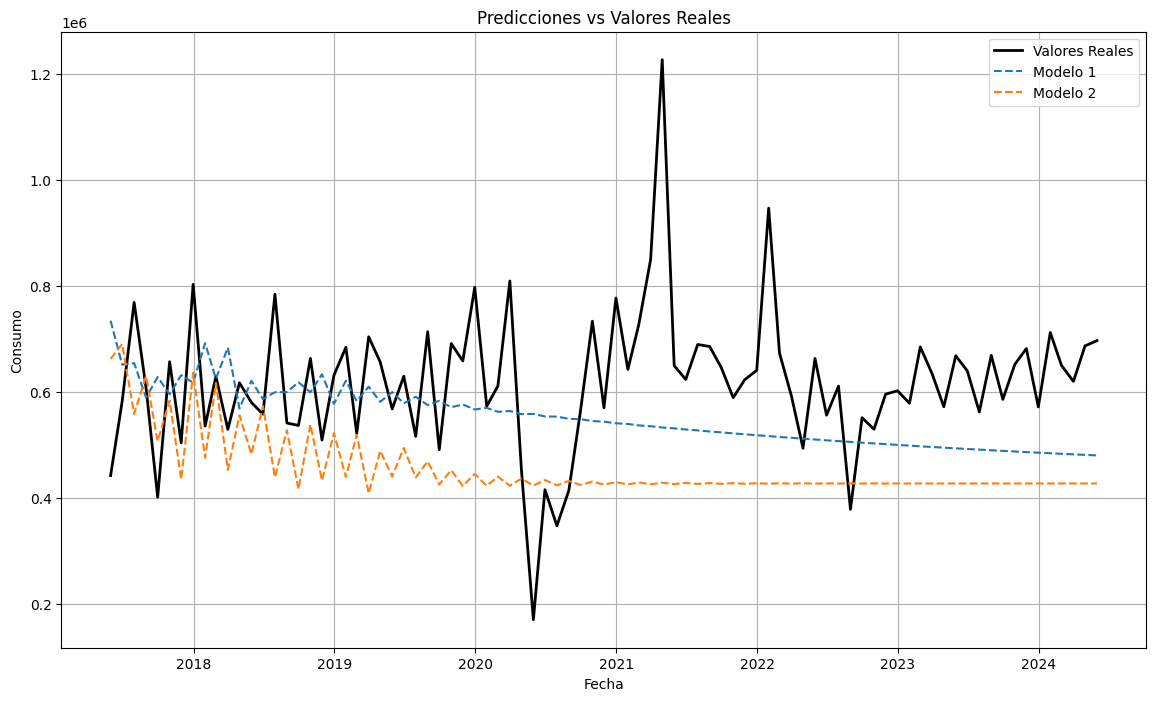

In [58]:
# Llamar a la función para graficar
plot_predictions_vs_real(test_series_i, predicciones_i)

De acá podemos ver que el modelo 2 es el más parecido en los primeros años, sin embargo a partir del 2020 ninguno de los modelos logra predecir de forma cercana el comportamiento de la importación de gasolina.

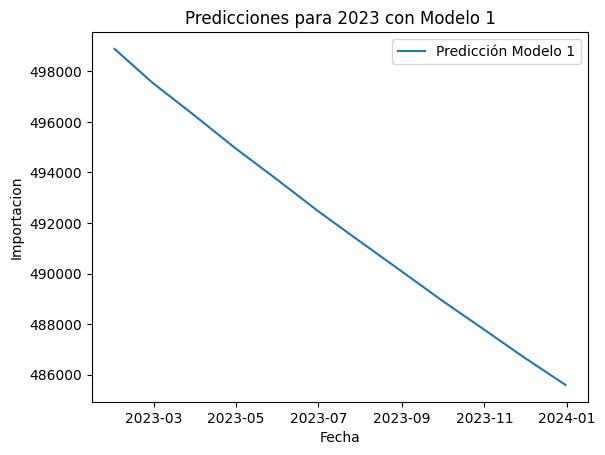

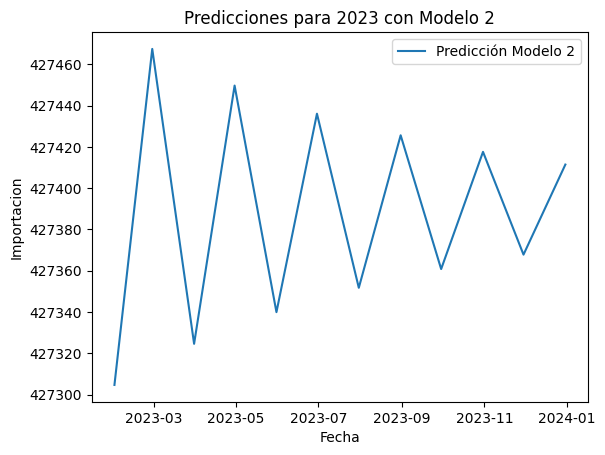

In [59]:
# Predicciones para 2023
future_dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='M')
future = pd.Series(index=future_dates)

for i, model in enumerate(modelo_importacion):
    forecast = model.predict(start=future_dates[0], end=future_dates[-1])
    future = pd.Series(forecast.values, index=future_dates)
    plt.figure()
    plt.plot(future.index, future.values, label=f'Predicción Modelo {i+1}')
    plt.title(f'Predicciones para 2023 con Modelo {i+1}')
    plt.xlabel('Fecha')
    plt.ylabel('Importacion')
    plt.legend()
    plt.show()

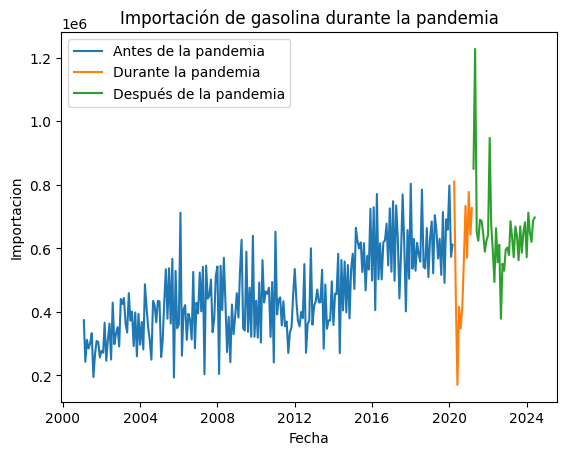

In [60]:
# Análisis de datos alrededor del período de pandemia
pandemic_start = '2020-03-01'
pandemic_end = '2021-03-01'

pre_pandemic= importacion_superior_resampled[:pandemic_start]
pandemic_period = importacion_superior_resampled[pandemic_start:pandemic_end]
post_pandemic = importacion_superior_resampled[pandemic_end:]

plt.figure()
plt.plot(pre_pandemic.index, pre_pandemic.values, label='Antes de la pandemia')
plt.plot(pandemic_period.index, pandemic_period.values, label='Durante la pandemia')
plt.plot(post_pandemic.index, post_pandemic.values, label='Después de la pandemia')
plt.legend()
plt.title('Importación de gasolina durante la pandemia')
plt.xlabel('Fecha')
plt.ylabel('Importacion')
plt.show()


De la grafica anterior podemos observar que la importación de la gasolina disminuyó significativamente durante la pandemia, y vemos que a finales del año 2020, la importación de gasolina vuelve a aumentar, y estabilizarse, sin embargo no aumenta de la cantidad que se importaba antes de pandemia.

**Precio**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Lik

Modelo 1 - AIC: 169.55619284330533, BIC: 217.1969038198186
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                ARIMA(1, 0, 31)   Log Likelihood                 -50.778
Date:                Sun, 04 Aug 2024   AIC                            169.556
Time:                        06:14:54   BIC                            217.197
Sample:                    01-31-2021   HQIC                           184.797
                         - 06-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.6796     22.753      1.392      0.164     -12.916      76.275
ar.L1         -0.1176   1.05e+04  -1.12e-05      1.000   -2.05e+04    2.

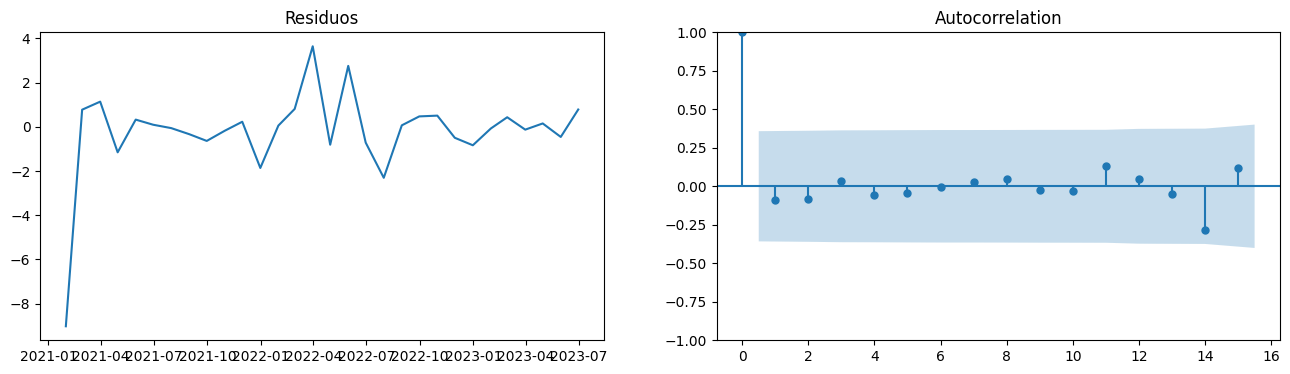

Modelo 2 - AIC: 172.80913988830872, BIC: 223.25224562814628
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                ARIMA(2, 0, 32)   Log Likelihood                 -50.405
Date:                Sun, 04 Aug 2024   AIC                            172.809
Time:                        06:14:54   BIC                            223.252
Sample:                    01-31-2021   HQIC                           188.946
                         - 06-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.8906     26.650      1.197      0.231     -20.342      84.123
ar.L1          0.7181   7052.094      0.000      1.000   -1.38e+04    1

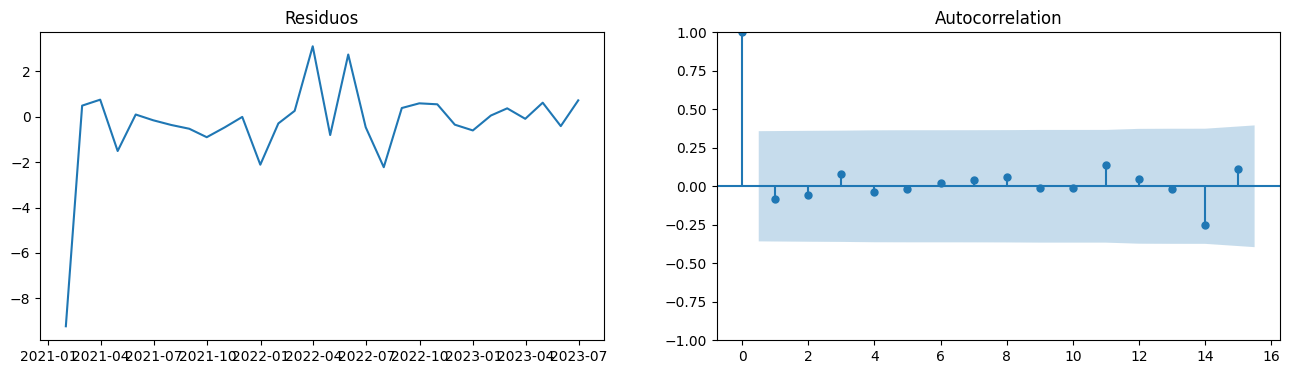

Modelo 1 - MSE en el conjunto de prueba: 23.221455317245677
Modelo 2 - MSE en el conjunto de prueba: 22.59635261011998


In [61]:
modelo_precio = modelsCreation(train_series_p, p=1, d=0, q=31)
# Predicciones en el conjunto de prueba
predicciones_p = {}
for i, model in enumerate(modelo_precio):
    pred = model.predict(start=test_series_p.index[0], end=test_series_p.index[-1])
    predicciones_p[f'Modelo {i+1}'] = pred

# Evaluar el rendimiento del modelo
from sklearn.metrics import mean_squared_error

for i, (model_name, pred) in enumerate(predicciones_p.items()):
    mse = mean_squared_error(test_series_p, pred)
    print(f'{model_name} - MSE en el conjunto de prueba: {mse}')

In [62]:
for i, result in enumerate(modelo_precio):
    print(f'Modelo {i+1} - AIC: {result.aic}, BIC: {result.bic}')

Modelo 1 - AIC: 169.55619284330533, BIC: 217.1969038198186
Modelo 2 - AIC: 172.80913988830872, BIC: 223.25224562814628


De acá podemos ver que: El Modelo 1 es preferido según el AIC, ya que tiene un valor más bajo, indicando que es más eficiente en términos de ajuste a los datos en comparación con el Modelo 2. Además, el Modelo 1 es preferido según el BIC, ya que penaliza más la complejidad del modelo.

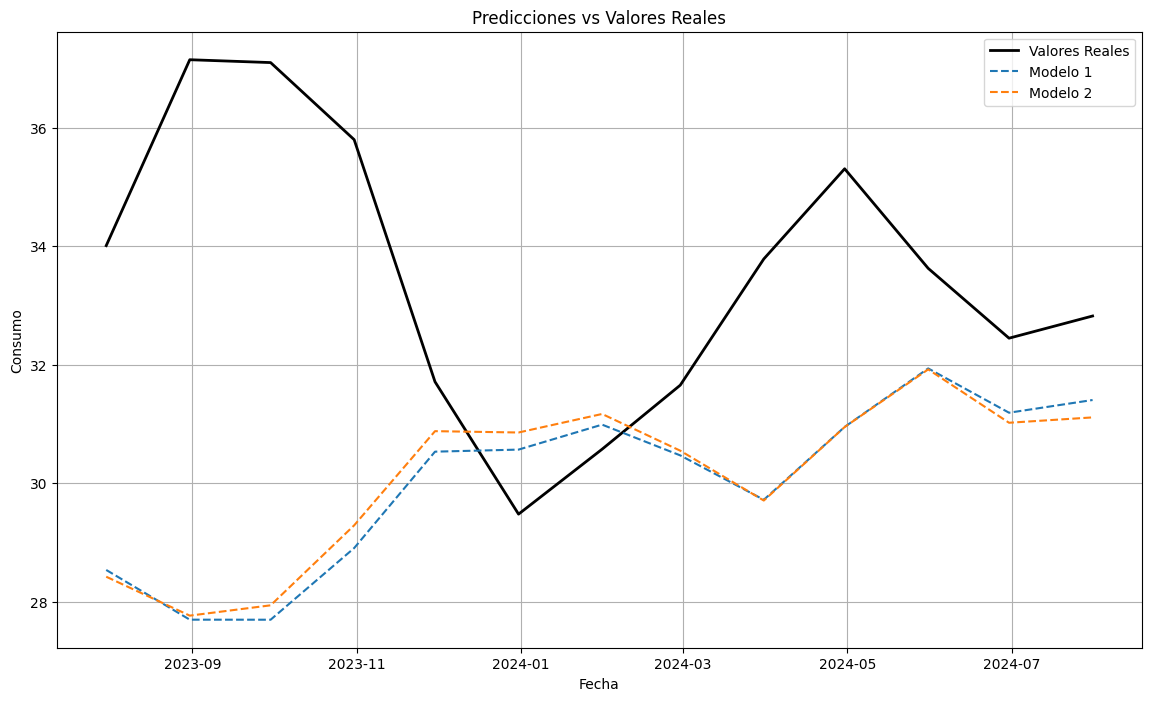

In [63]:
plot_predictions_vs_real(test_series_p, predicciones_p)

Como podemos observar en el gráfico anterior, ninguno de los dos modelos se asemeja lo suficiente al comportamiento real de los datos. Esto puede deberse a que en el Data Frame de precios hay significativamente menos datos que en los otros data frames, lo que no permite que los modelos puedan entrenarse de forma correcta.

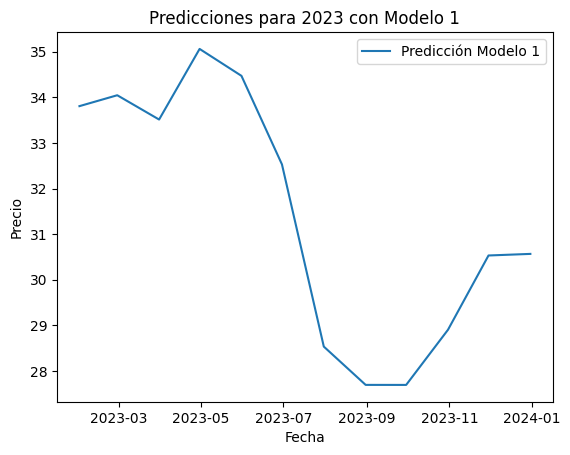

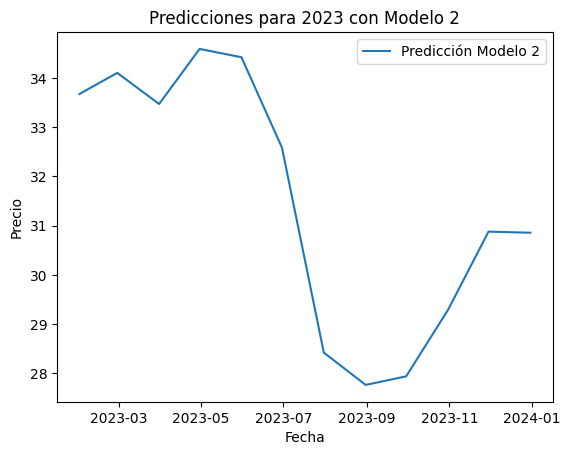

In [64]:
# Predicciones para 2023
future_dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='M')
future = pd.Series(index=future_dates)

for i, model in enumerate(modelo_precio):
    forecast = model.predict(start=future_dates[0], end=future_dates[-1])
    future = pd.Series(forecast.values, index=future_dates)
    plt.figure()
    plt.plot(future.index, future.values, label=f'Predicción Modelo {i+1}')
    plt.title(f'Predicciones para 2023 con Modelo {i+1}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.legend()
    plt.show()

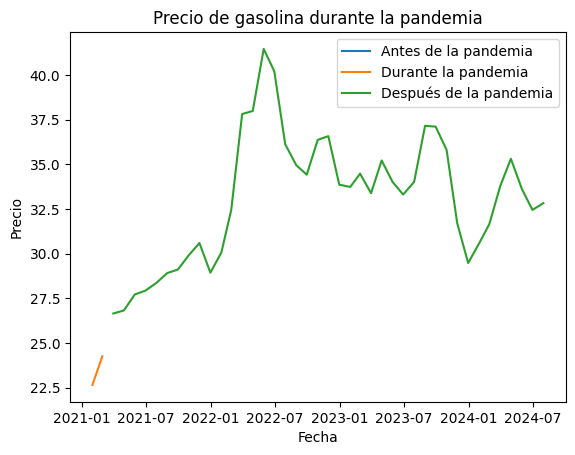

In [65]:
# Análisis de datos alrededor del período de pandemia
pandemic_start = '2020-03-01'
pandemic_end = '2021-03-01'

pre_pandemic= precio_superior_resampled[:pandemic_start]
pandemic_period = precio_superior_resampled[pandemic_start:pandemic_end]
post_pandemic = precio_superior_resampled[pandemic_end:]

plt.figure()
plt.plot(pre_pandemic.index, pre_pandemic.values, label='Antes de la pandemia')
plt.plot(pandemic_period.index, pandemic_period.values, label='Durante la pandemia')
plt.plot(post_pandemic.index, post_pandemic.values, label='Después de la pandemia')
plt.legend()
plt.title('Precio de gasolina durante la pandemia')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.show()

# Conclusión final
Podemos ver que en las tres series de tiempo es preferible utilizar el Modelo 1 según el AIC y el BIC. Sin embargo, en algunas gráficas podemos ver que el Modelo 2 es más cercano al comportamiento de los datos reales en los primeros años. Sin embargo, el menor AIC y BIC del modelo 1 nos indican que ese modelo es mejor durante todo el tiempo analizado y no únicamente en los primeros años.